In [292]:
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 20px; }</style>"))

# Theory Computing - Neutron Stars: Notebook 1
<div style="text-align: right"> Jude McClay and Rasheed Miladi </div>

 
Initially, we will attempt to solve these two coupled Ordinary Differential Equations (ODEs):

$\frac{dm(r)}{dr} = 4\pi r^2\rho$ (1)

$\frac{dP}{dr} = \frac{-Gm(r)\rho (r)}{r^2}$. (2)

These can be combined to produce a single, second-order differential equation:

$\frac{1}{r^2}\frac{d}{dr}(\frac{r^2}{\rho}\frac{dP}{dr})=-4\pi G\rho$ (3)

We now introduce the Polytropic relation, given by

$P=K\rho^{\gamma}c^{2\gamma}$, where $\gamma = 1+\frac{1}{n}$, and where $n$ is a constant parameter known as the polytropic index. Different values of $n$ can be suitable for modeling different massive bodies: neutron stars are modelled well by $n$ values between $0.5$ and $1.0$. The white dwarf equation of state corresponds to $n = \frac{3}{2} (\gamma = \frac{5}{3})$ in the non-relativistic limit, and $n = 3 (\gamma = \frac{4}{3})$ in the relativistic limit.

We can use this relation to rewrite Equation 3 in terms of $\rho$ and $r$ only, eliminating the pressure, $P$: since

$\frac{dP}{dr} = \frac{dP}{d\rho}\frac{d\rho}{dr}$,

it follows that

$\Longrightarrow \frac{1}{r^2}\frac{d}{dr}(\frac{Kr^2}{\rho}\rho^{\gamma - 1}\frac{d\rho}{dr})=-4\pi G\rho$. (4)

$\Longrightarrow \frac{1}{r^2}\frac{d}{dr}(\frac{n+1}{n}\frac{Kr^2}{\rho}\rho^{\frac{1}{n}}c^{2(1+\frac{1}{n})}\frac{d\rho}{dr})=-4\pi G\rho$. (5)

From here, we can introduce some dimensionless parameters to simplify the problem:

$r=at$, and $\rho = \rho_c x^n$, where $a$ is a constant, $\rho_c$ is the central pressure of the body, and $x$ is a dimensionless density function [citation].

$\Longrightarrow \frac{1}{t^2}\frac{d}{dt}(t^2\frac{dx}{dt})=-x^n(\frac{4\pi G }{(n+1)Kc^{2(1+\frac{1}{n})}\rho_c^{\frac{1}{n}-1}}a^2)$. (6)

It is therefore appropriate to choose $a^2$ to be

$a^2 = \frac{(n+1)Kc^{2(1+\frac{1}{n})}\rho_c^{\frac{1}{n}-1}}{4\pi G}$.

This reduces Equation 6 to

$\frac{1}{t^2} \frac{d}{dt} (t^2 \frac{dx}{dt}) = -x^n$, (7).

This will be subject to two intial conditions:

$1: x(t=0) = (\frac{\rho (0)}{\rho_c})^{\frac{1}{n}} = 1$, which simply corresponds to the pressure at $R = 0$ being equal to $\rho_c$, and:

$2: \frac{dx}{dt}\mid_{t = 0} = 0$.

This can be solved numerically with relative ease.

From this, we would like to find $m(r)$, which can be found by by starting with Equation 1:

$m(r) = \int_0^R \! 4\pi r^2 \, dr$

By multiplying Equation 7 by $t^2$, it can be shown that

$m = 4\pi a^3 \rho_c \int_0^t \!t^2 x^n dt = 4\pi a^3 \rho_c \mid{t^2 \frac{dx}{dt}}\mid$

Try some numbers for a highly relativistic case:

Using Equation 27 from https://arxiv.org/pdf/astro-ph/0506417.pdf for our value of $K$:

$K_{rel} = \frac{\hbar c}{12\pi^2}(\frac{3\pi^2 Z}{m_N c^2 A})^{\frac{4}{3}}$

or

$K_{non-rel} = \frac{\hbar^2}{15\pi^2 m_e}(\frac{3\pi^2 Z}{Am_n c^2})^{\frac{5}{3}}$,

where $Z$ is the Proton number and $A$ is the Atomic Mass number. For a star predominantly composed of $^{12}C$, the ratio $\frac{Z}{A} = \frac{1}{2}$.




Still to do: 

Truncate solution points to only include positive densities $\checkmark$

Relativistic corrections

S. Weinberg, Gravitation and Cosmology: Principles and Applications of the General Theory of Relativity (John Wiley
and Sons, New York, 1972).

S. Eidelman et al., Phys. Lett. B 592, 1 (2004), URL http://pdg.lbl.gov.
    


In [293]:
import numpy as np
import scipy.linalg as lg
import matplotlib.pyplot as plt
from scipy import constants
from scipy.integrate import odeint
from scipy.integrate import ode
from scipy.integrate import solve_ivp

from matplotlib import rc
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

rcParams['figure.dpi'] = 100
%matplotlib inline


from IPython.display import Latex, display

In [294]:
#Define constants

G = constants.gravitational_constant
c = constants.speed_of_light
#K = 1.210374449 * 10**-13 #K_rel
K = 1.7239577222 * 10**-22 #K_non-rel
central_pressure = 8.11512348*10**8 #N/m^2; is about 

solar_mass = 2 * 10**30 #Kg



In [295]:

#Equation we want to solve

def model(y, t, n):
    """
    {y} = array containing x and dx/dt, where x is the unitless density, and t is the unitless distance from the centre

    {t} = float.
    """
       
    #n = 1
    x = y[0]
    dxdt = y[1] # z = dx/dt.
    
    x_dot = [[],[]]
    x_dot[0] = dxdt
    try:
        
        x_dot[1] = -((2/t) * dxdt + np.abs(x)**n)
    
    except ZeroDivisionError or ValueError:
        
        x_dot[1] = -(2 + np.abs(x)**n)
    
    return x_dot

h = 0.01
t_initial = 0.
t_final = 100.
t_values = np.linspace(0, 11, 100000)

    

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

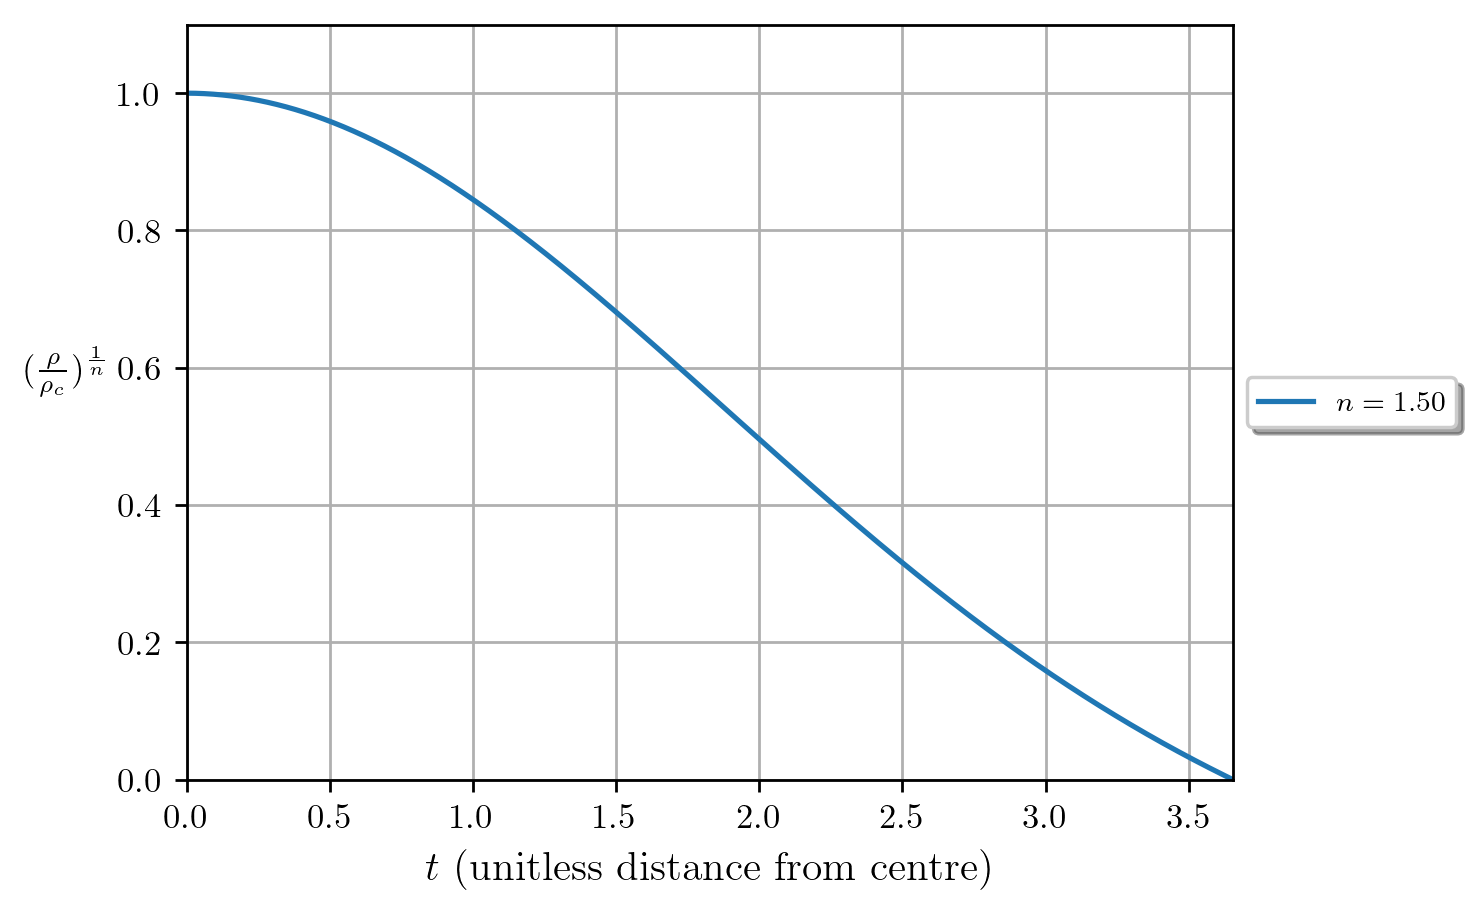

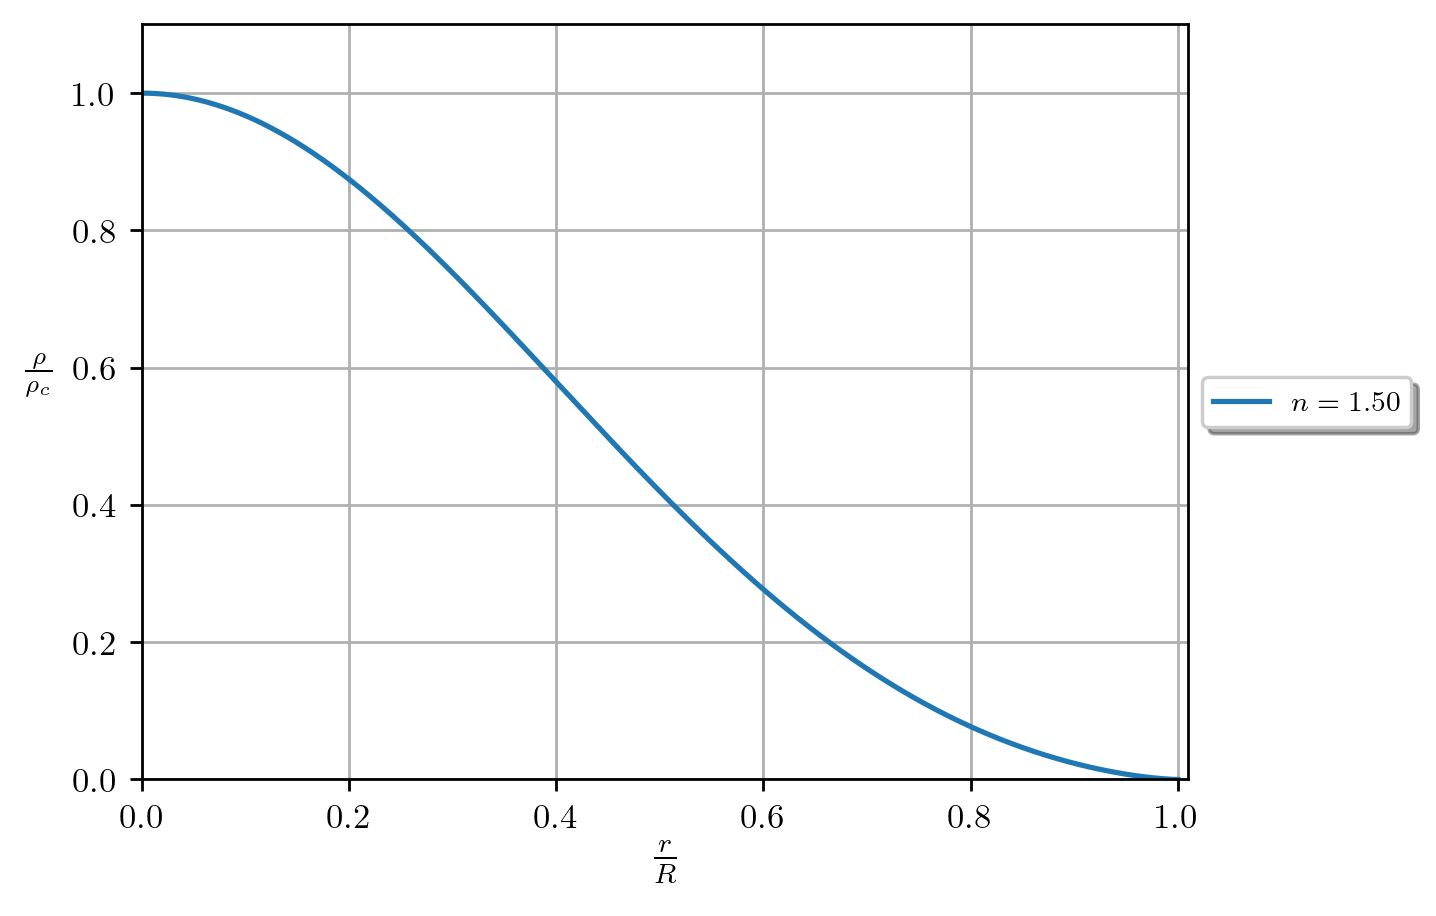

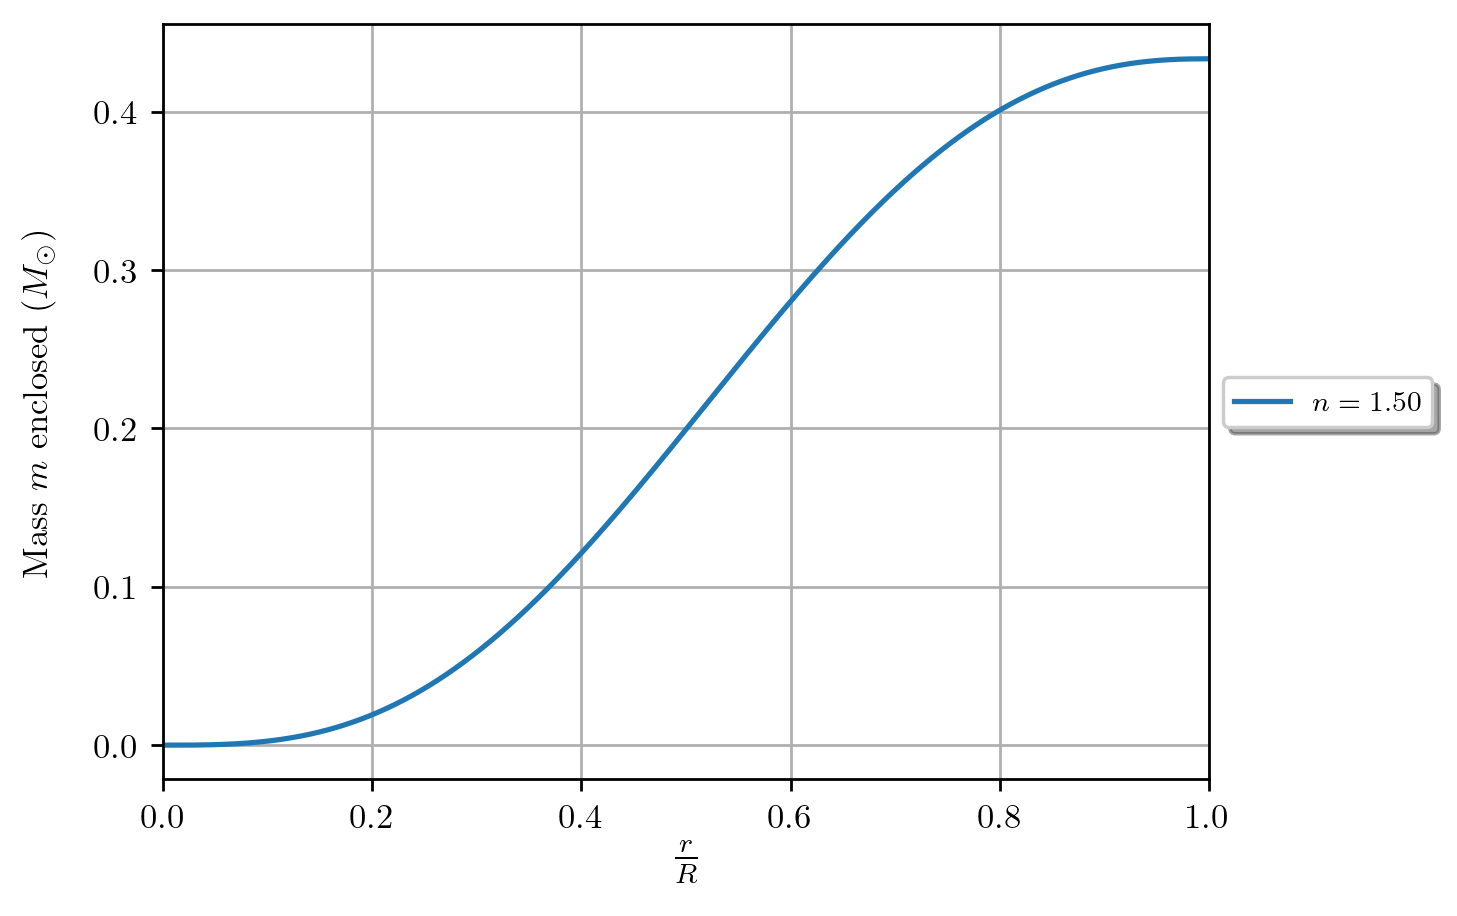

In [296]:
def solve_and_plot(t_values):
    
    fig1 = plt.figure(dpi = 250)
    ax1 = fig1.add_subplot(111)
    ax1.set_ylim(bottom = 0., top = 1.1)
    
    fig2 = plt.figure(dpi = 250)
    ax2 = fig2.add_subplot(111)
    ax2.set_xlim(left = 0., right = 1.01)
    ax2.set_ylim(bottom = 0., top = 1.1)
    
    fig3 = plt.figure(dpi = 250)
    ax3 = fig3.add_subplot(111)
    #ax3.set_xlim(left = 0., right = 1.01)
    #ax3.set_ylim(bottom = 0.)
    
    
    
    for i in np.arange(1.5, 2, 1): #start, end, step
        
        solution_points = odeint(model, [1,0], t_values, (i,)) #array contains initial conditions for x and dx/dt
        densities = solution_points[:,0]
        intercept_index = np.argmin(np.abs(densities)) # finds point where density becomes negative (a bit crudely for now)
        
        truncated_t_values = t_values
        truncated_t_values = np.delete(truncated_t_values, np.s_[intercept_index + 1:])
        scaled_t_values = truncated_t_values / t_values[intercept_index] 
        
        densities = np.delete(densities, np.s_[intercept_index + 1:]) # removes all negative densities
        density_derivatives = solution_points[:,1]
        density_derivatives = np.delete(density_derivatives, np.s_[intercept_index + 1:])
        
        body_radius_t = truncated_t_values[-1]
        dxdt_at_surface = density_derivatives[-1]
        
        display(Latex("Results for $n = {0:4.3f}$:".format(i)))
        display(Latex("The body is defined by the boundary $t = t_R = {0:4.3f}$".format(body_radius_t)))
        display(Latex("At this point, $\\frac{{dx}}{{dt}} \\bigg\\rvert_{{t=t_R}} = {0:4.3f}$".format(dxdt_at_surface)))
        display(Latex("$t_R^2 \\left| \\frac{{dx}}{{dt}} \\right|_{{t=t_R}} = {0:4.3f}$".format(body_radius_t**2 * np.abs(dxdt_at_surface))))
        
        ax1.plot(truncated_t_values, densities, label = '$n = {0:1.2f}$'.format(i))
        ax2.plot((truncated_t_values / t_values[intercept_index]), np.power(np.abs(densities), i), label = '$n = {0:1.2f}$'.format(i))
        
        a = np.sqrt(((i + 1)* c**(2*(1 + (1 / i))) * K * central_pressure**((1 / i) - 1))/(4 * np.pi * G))
        
        mass_values = 4 * np.pi * a**3 * central_pressure * np.abs((truncated_t_values)**2 * density_derivatives)
        scaled_mass_values = mass_values / solar_mass
        
        
        
        ax3.plot(scaled_t_values, scaled_mass_values, label = '$n = {0:1.2f}$'.format(i))
        
        #x_minor = np.arange(0, np.amax(scaled_t_values) + 1, 20)
        #x_minor = np.arange(0, 2, 20)
        #x_major = np.arange(0, np.amax(scaled_t_values) + 1, 5)
        #x_major = np.arange(0, 2, 5)
        
        #y_minor = np.arange(0, np.amax(scaled_mass_values) + 1, 20)
        #y_minor = np.arange(0, 2, 20)
        #y_major = np.arange(0, np.amax(scaled_mass_values) + 1, 5)
        #y_major = np.arange(0, 2, 5)
        
        #ax3.set_xticks(x_major)
        #ax3.set_xticks(x_minor, minor = True)
        
        #ax3.set_yticks(y_major)
        #ax3.set_yticks(y_minor, minor = True)
        
        #ax3.grid(which = 'both')
        #ax3.set_yticks()
        #ax3.set_xticks()
        
        body_radius = body_radius_t * a
        body_mass = 4 * np.pi * a**3 * central_pressure * body_radius_t**2 * np.abs(dxdt_at_surface)
        display(Latex("The radius of the body, $R = {0:4.0f}$ km".format(body_radius / 1000)))
        display(Latex("The mass of the body, $M = {0:4.2f} M_{{\\odot}}$".format(body_mass / solar_mass)))
        
        
    #final plotting details
    
    box_1 = ax1.get_position()
    ax1.set_position([box_1.x0, box_1.y0, box_1.width * 0.9, box_1.height])
    ax1.legend(loc='center left', bbox_to_anchor = (1, 0.5), fontsize = 8, shadow = True)
    ax1.set_xlabel("$t$ (unitless distance from centre)", fontsize = "large")
    ax1.set_ylabel("$(\\frac{\\rho}{\\rho_c})^{\\frac{1}{n}}$", rotation = 0, labelpad = 15)
    ax1.margins(x = 0)
    ax1.grid()
    
    box_2 = ax2.get_position()
    ax2.set_position([box_2.x0, box_2.y0, box_2.width * 0.9, box_2.height])
    ax2.legend(loc='center left', bbox_to_anchor = (1, 0.5), fontsize = 8, shadow = True)
    ax2.set_xlabel("$\\frac{r}{R}$", fontsize = "large")
    ax2.set_ylabel("$\\frac{\\rho}{\\rho_c}$", rotation = 0, labelpad = 10)
    ax2.margins(x = 0)
    ax2.grid()
    
    box_3 = ax3.get_position()
    ax3.set_position([box_3.x0, box_3.y0, box_3.width * 0.9, box_3.height])
    ax3.legend(loc ='center left', bbox_to_anchor = (1, 0.5), fontsize = 8, shadow = True)
    ax3.set_xlabel("$\\frac{r}{R}$", fontsize = "large")
    ax3.set_ylabel("Mass $m$ enclosed $(M_{{\\odot}})$", labelpad = 10)
    ax3.margins(x = 0)
    ax3.grid()
    
    plt.show()

    return None

data_points = solve_and_plot(t_values)

#print(data_points[0])


The point where each curve intersects $\frac{\rho}{\rho_c}=0$ defines the radius of the body. The density for $n = 5$ never reaches 0, and hence can describe a body of infinite radius.